## Banking Customer Churn Prediction  
**Vinay Nagaraj**

### Overview

Customers are the most important part of your business regardless of the industry. There would be no sales without customers and they are a critical factor when developing your marketing messaging and strategy. Customer Churn is the rate at which customers stop doing business with an entity. This is one of the most acknowledged problems in the banking sector and Banks are constantly looking at data/suggestions which could help them improve their customer service and retain their existing customers and also bring in new customers.

Banks often use customer churn analysis and customer churn rates as one of their key business metrics because the cost of retaining existing customers is far less than acquiring a new one. Customer churn prevention is one of the deciding factors when it comes to maximizing the revenues of any organization. 

As part of this project, I will be using the dataset [Kaggle](https://www.kaggle.com/shrutimechlearn/churn-modelling) by which I intend to focus on the behavior of bank customers who are more likely to leave the bank. I want to find out some striking behaviors of customers through Exploratory Data Analysis and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc, make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report

In [2]:
# Read our data
churn_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Check the dimension of the data frame
print("The dimension of the table is: ", churn_data.shape)

The dimension of the table is:  (10000, 14)


In [4]:
# Lets look at some sample records to understand the data
print(churn_data.head(5).T)

                        0         1         2         3         4
RowNumber               1         2         3         4         5
CustomerId       15634602  15647311  15619304  15701354  15737888
Surname          Hargrave      Hill      Onio      Boni  Mitchell
CreditScore           619       608       502       699       850
Geography          France     Spain    France    France     Spain
Gender             Female    Female    Female    Female    Female
Age                    42        41        42        39        43
Tenure                  2         1         8         1         2
Balance                 0   83807.9    159661         0    125511
NumOfProducts           1         1         3         2         1
HasCrCard               1         0         1         0         1
IsActiveMember          1         1         0         0         1
EstimatedSalary    101349    112543    113932   93826.6   79084.1
Exited                  1         0         1         0         0


In [5]:
# Check the types of each feature
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Check for any missing values
churn_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Understand the categorical data in our dataset
for column in churn_data.columns:
  if churn_data[column].dtype == object:
    print("{} : {}".format(str(column), str(churn_data[column].unique())))
    print(churn_data[column].value_counts())
    print("-----------------------------------------------------\n\n")

Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Bogdanova     1
Upjohn        1
Hazon         1
Herrin        1
Wilkie        1
Name: Surname, Length: 2932, dtype: int64
-----------------------------------------------------


Geography : ['France' 'Spain' 'Germany']
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
-----------------------------------------------------


Gender : ['Female' 'Male']
Male      5457
Female    4543
Name: Gender, dtype: int64
-----------------------------------------------------




Below are our observations so far:\
1) Input data has 10000 records and 14 features.\
2) There is no missing values.\
3) 'RowNumber','CustomerId', 'Surname' seems to be irrelevant features to our analysis. 

In [9]:
# Drop the 3 features which we are identified as unimportant.
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data = churn_data.drop('CustomerId', axis=1)
churn_data = churn_data.drop('Surname', axis=1)

**Data Summary**
- Surname : The surname of the customer
- CreditScore : The credit score of the customer
- Geography : The country of the customer(Germany/France/Spain)
- Gender : The gender of the customer (Female/Male)
- Age : The age of the customer
- Tenure : The customer's number of years in the in the bank
- Balance : The customer's account balance
- NumOfProducts : The number of bank products that the customer uses
- HasCrCard : Does the customer has a card? (0=No,1=Yes)
- IsActiveMember : Does the customer has an active membership (0=No,1=Yes)
- EstimatedSalary : The estimated salary of the customer
- Exited : Churned or not? (0=No,1=Yes)

### Graph Analysis/EDA

In [10]:
# Identify the Count of Customers who have an active account (Exited = 0) vs Employees who have exited the bank (Exited = 1)
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

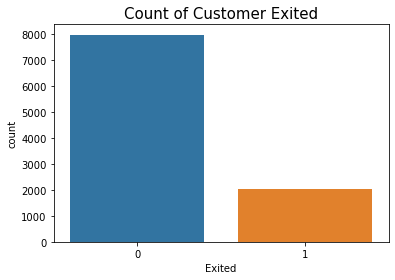

In [11]:
# Plot the Customer Exited
sns.countplot(churn_data.Exited)
plt.title("Count of Customer Exited",fontsize=15)
plt.show()

Total count of Customers who have an active account is 7,963\
Total count of Customers who no longer have an account with the bank is 2,037

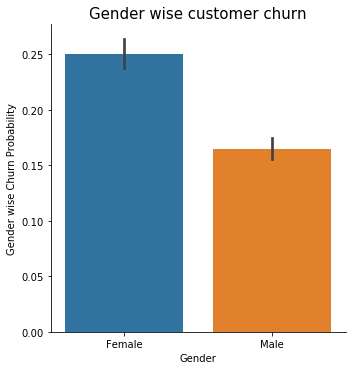

In [12]:
# plot Gender wise customer churn
g= sns.catplot(x = "Gender", y = "Exited", data = churn_data, kind = "bar", height = 5)
g.set_ylabels("Gender wise Churn Probability")
plt.title("Gender wise customer churn",fontsize=15)
plt.show()

Per the plot above, looks like Female exits the bank more

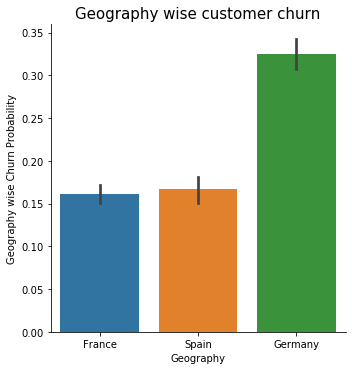

In [13]:
# plot Geography wise customer churn
g= sns.catplot(x = "Geography", y = "Exited", data = churn_data, kind = "bar", height = 5)
g.set_ylabels("Geography wise Churn Probability")
plt.title("Geography wise customer churn",fontsize=15)
plt.show()

Per the plot above, looks like Customers in Germany exits the bank more

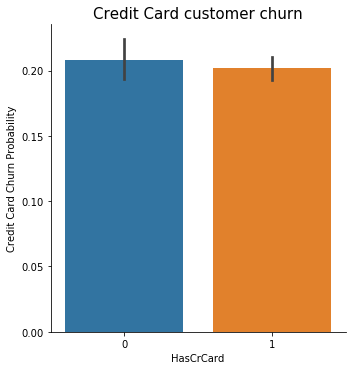

In [14]:
# plot Credit card wise customer churn
g= sns.catplot(x = "HasCrCard", y = "Exited", data = churn_data, kind = "bar", height = 5)
g.set_ylabels("Credit Card Churn Probability")
plt.title("Credit Card customer churn",fontsize=15)
plt.show()

Per the above plot, Customers with no credit card tend to leave the bank more than customers with credit card.

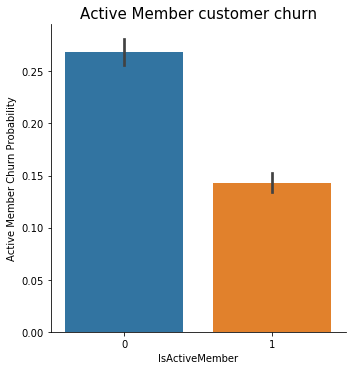

In [15]:
# plot Credit card wise customer churn
g= sns.catplot(x = "IsActiveMember", y = "Exited", data = churn_data, kind = "bar", height = 5)
g.set_ylabels("Active Member Churn Probability")
plt.title("Active Member customer churn",fontsize=15)
plt.show()

Per the above plot, inactive members tend to exit the bank more

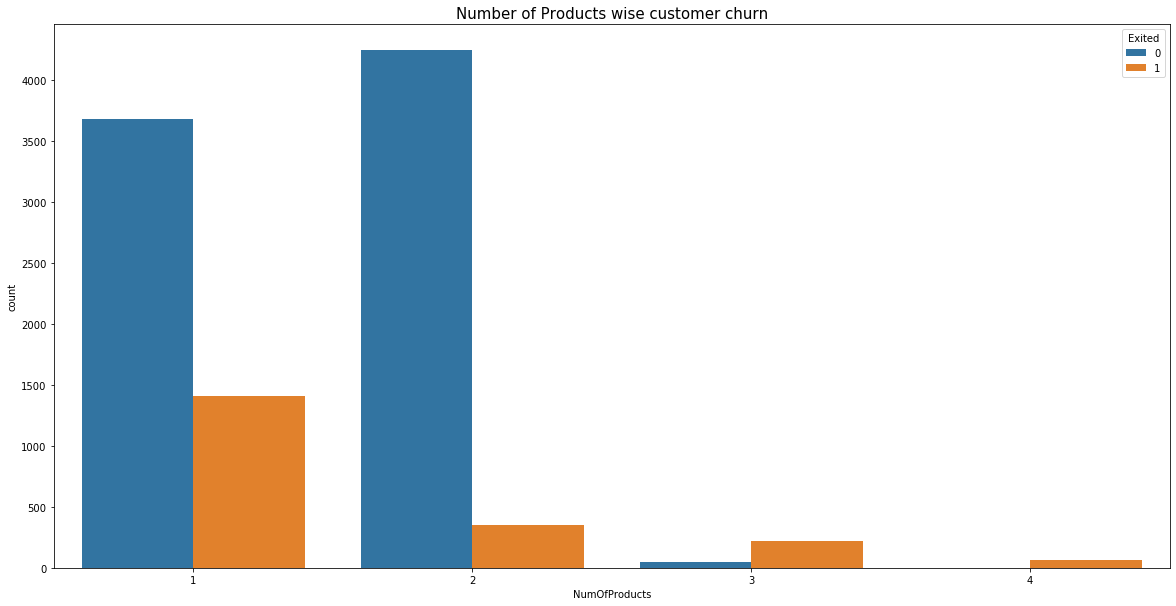

In [16]:
# plot Product wise customer churn
plt.figure(figsize=(20,10))
sns.countplot(churn_data['NumOfProducts'],hue=churn_data['Exited'])
plt.title("Number of Products wise customer churn",fontsize=15)
plt.show()

Per the above plot, the ratio of exited cases with 3 or more products definitely higher than under 2 products

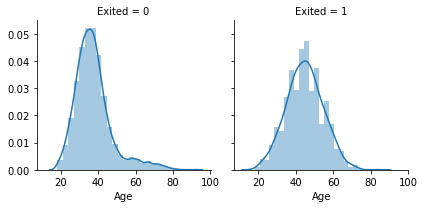

In [17]:
# plot Age wise customer churn
g= sns.FacetGrid(churn_data, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

Per the above plot, People with Ages between 30 to 40 has the highest probability of staying and Ages between 45 to 55 has the highest probability of leaving

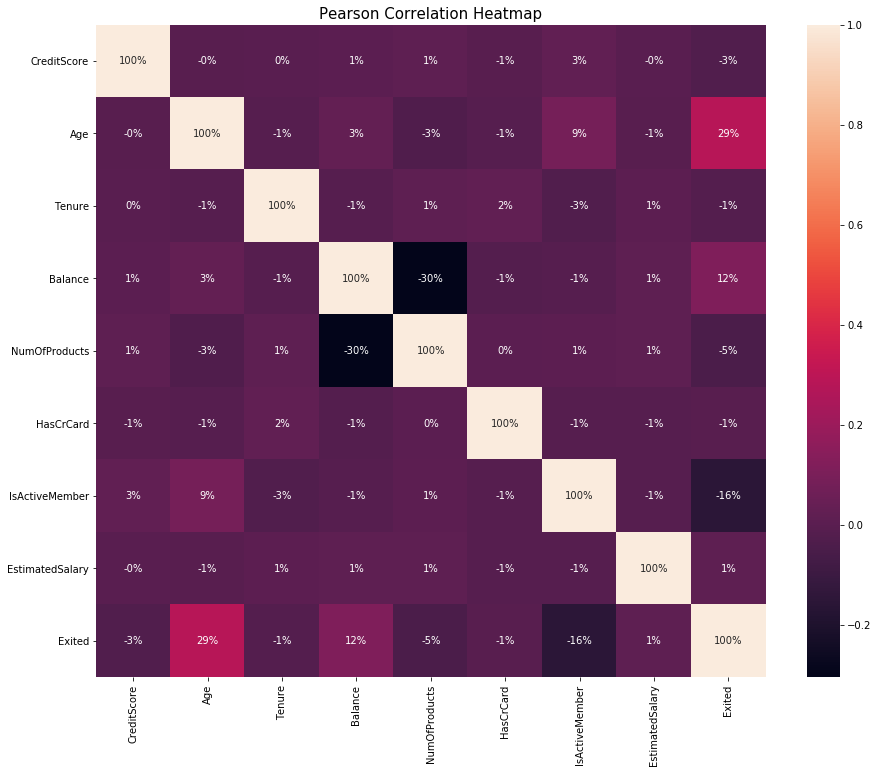

In [18]:
# Pearson Correlation Heatmap
plt.subplots(figsize=(15,12))
sns.heatmap(churn_data.corr(method = 'pearson'), annot=True, fmt='.0%')
plt.title("Pearson Correlation Heatmap",fontsize=15)
plt.show()

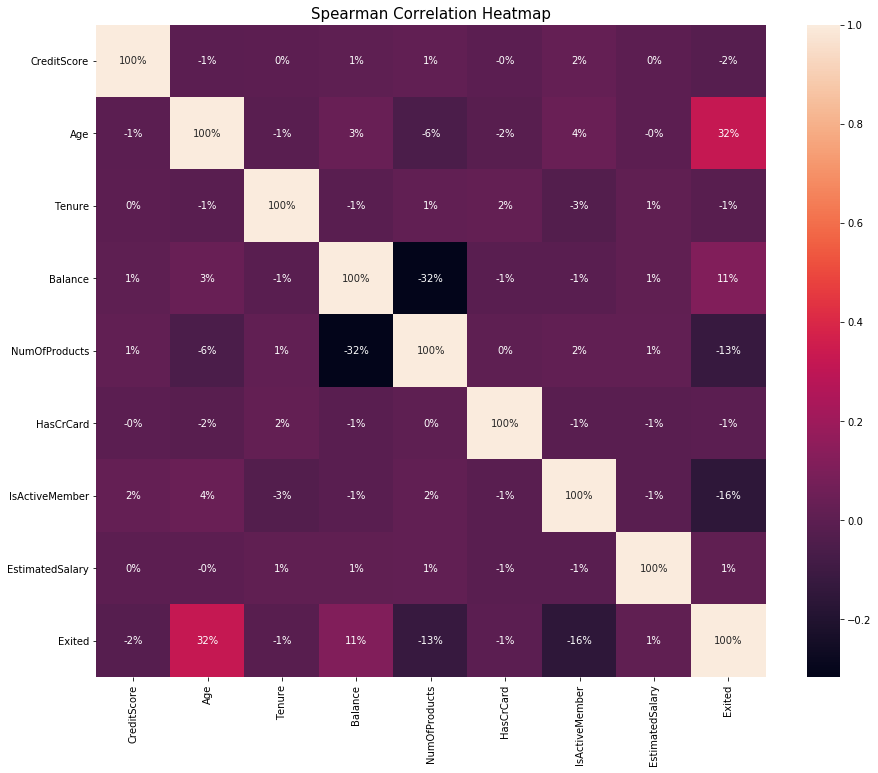

In [19]:
# Spearman Correlation Heatmap
plt.subplots(figsize=(15,12))
sns.heatmap(churn_data.corr(method = 'spearman'), annot=True, fmt='.0%')
plt.title("Spearman Correlation Heatmap",fontsize=15)
plt.show()

### Train/Test

In [20]:
# Update the data in Geography column, by changing value of France to 0, Germany to 1 and Spain to 2
churn_data['Geography'].replace({'France': 0, 'Germany': 1, 'Spain': 2}, inplace = True)

In [21]:
# Update the data in Gender column, by changing value of Male to 0 and Female to 1
churn_data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [22]:
# Train and test data
x=churn_data.drop(columns=["Exited"],axis="columns")
y=churn_data.Exited

In [23]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [25]:
# Details of training dataset
print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)
print("Counts of label '1': {}".format(sum(y_train==1)))
print("Counts of label '0': {} \n".format(sum(y_train==0)))

Transaction Number x_train dataset:  (7000, 10)
Transaction Number y_train dataset:  (7000,)
Transaction Number x_test dataset:  (3000, 10)
Transaction Number y_test dataset:  (3000,)
Counts of label '1': 1453
Counts of label '0': 5547 



Since there are only 10 features in our train and test datasets, there is no need to perform feature reduction. Let us understand the feature importance through SelectKBest

In [26]:
# Determine 10 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))         # print all 10 features in the order

      Feature_Name       Score
3              Age  621.256581
8   IsActiveMember  174.139240
5          Balance  104.241621
2           Gender   85.618179
6    NumOfProducts   19.021790
1        Geography    9.799450
0      CreditScore    5.859852
4           Tenure    2.764884
7        HasCrCard    1.878124
9  EstimatedSalary    0.247795


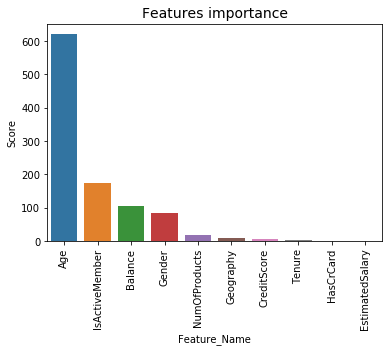

In [27]:
# Bar plot showing features in the order of score
tmp = feature_scores.sort_values(by='Score',ascending=False) 
plt.title('Features importance',fontsize=14) 
s = sns.barplot(x='Feature_Name',y='Score',data=tmp) 
s.set_xticklabels(s.get_xticklabels(),rotation=90) 
plt.show()

### Model Evaluation & Selection

In [28]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [29]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [30]:
# Define reference model
model = DummyClassifier(strategy='constant', constant=1)

In [31]:
# define the reference model

model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(x_train, y_train, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


In [32]:
# Normalizing the data could improve the performance of the model

scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [33]:
def model_val(X, y, classifier, scor, show):
  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [34]:
# List of models

rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
gnb = GaussianNB()


model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr, knn, svm, gnb):
    model.append(classifier.__class__.__name__)
    score.append(model_val(x_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.85 (+/- 0.01)
Score: 0.69 (+/- 0.01)
Score: 0.66 (+/- 0.03)
Score: 0.75 (+/- 0.02)
Score: 0.78 (+/- 0.01)
Score: 0.82 (+/- 0.02)
Score: 0.80 (+/- 0.01)


,roc_auc
RandomForestClassifier,0.847526
DecisionTreeClassifier,0.688952
SGDClassifier,0.664615
LogisticRegression,0.752895
KNeighborsClassifier,0.781499
SVC,0.822679
GaussianNB,0.803606


From the model score comparison we can see random forest classification gave the best result.

Now let us perform some tuning on our top 3 models - Random Forest Classifier, SVC and GaussianNB

#### Random Forest Model - HyperParameter Tuning

In [35]:
# Hyperparameter tuning using Grid Search

parameters_rfc = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini'], 'max_features': ['sqrt']}]
grid_search_rfc = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = parameters_rfc,
                           scoring = 'roc_auc',
                           n_jobs = -1)
grid_search_rfc.fit(x_train_norm, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_features': ['sqrt'],
                          'n_estimators': [10, 25, 50, 100, 500]}],
             scoring='roc_auc')

In [36]:
print('Best Score: ', grid_search_rfc.best_score_.round(2))
print('Best Parameters: ', grid_search_rfc.best_params_)

Best Score:  0.86
Best Parameters:  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}


In [37]:
y_pred_rfc = grid_search_rfc.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix - Random Forest')
print(confusion_matrix(y_test, y_pred_rfc), '\n')
    
print('Classification report - Random Forest')
print(classification_report(y_test, y_pred_rfc, digits=dec))
    
print('Scalar Metrics - Random Forest')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_search_rfc.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_search_rfc.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix - Random Forest
[[2344   72]
 [ 316  268]] 

Classification report - Random Forest
              precision    recall  f1-score   support

           0     0.8812    0.9702    0.9236      2416
           1     0.7882    0.4589    0.5801       584

    accuracy                         0.8707      3000
   macro avg     0.8347    0.7146    0.7518      3000
weighted avg     0.8631    0.8707    0.8567      3000

Scalar Metrics - Random Forest
        AUROC = 0.8610


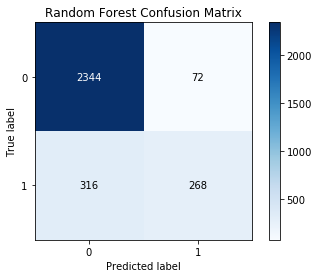

In [38]:
# Plot confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rfc)
plt.title('Random Forest Confusion Matrix')
plt.show()

#### SVC Model - HyperParameter Tuning

In [39]:
# Hyperparameter tuning using Grid Search

parameters_svm = [{'C': [1, 10], 'kernel': ('linear', 'rbf')}]
grid_search_svm = GridSearchCV(estimator=SVC(),
             param_grid=parameters_svm, scoring='roc_auc')
grid_search_svm.fit(x_train_norm, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10], 'kernel': ('linear', 'rbf')}],
             scoring='roc_auc')

In [40]:
print('Best Score: ', grid_search_svm.best_score_.round(2))
print('Best Parameters: ', grid_search_svm.best_params_)

Best Score:  0.82
Best Parameters:  {'C': 1, 'kernel': 'rbf'}


In [41]:
y_pred_svm = grid_search_svm.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svm), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred_svm, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_search_svm.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_search_svm.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[2372   44]
 [ 367  217]] 

Classification report
              precision    recall  f1-score   support

           0     0.8660    0.9818    0.9203      2416
           1     0.8314    0.3716    0.5136       584

    accuracy                         0.8630      3000
   macro avg     0.8487    0.6767    0.7169      3000
weighted avg     0.8593    0.8630    0.8411      3000

Scalar Metrics
        AUROC = 0.8216


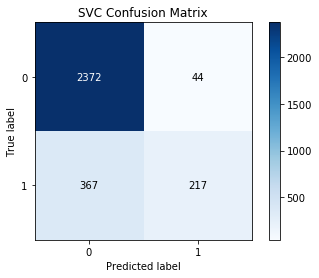

In [42]:
# Plot confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)
plt.title('SVC Confusion Matrix')
plt.show()

#### GaussianNB Model - HyperParameter Tuning

In [43]:
nb_classifier = GaussianNB()

parameters_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search_nb = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=parameters_nb, 
                 verbose=1, 
                 scoring='roc_auc') 
grid_search_nb.fit(x_train_norm, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc', verbose=1)

In [44]:
print('Best Score: ', grid_search_nb.best_score_.round(2))
print('Best Parameters: ', grid_search_nb.best_params_)

Best Score:  0.8
Best Parameters:  {'var_smoothing': 3.511191734215127e-05}


In [45]:
y_pred_nb = grid_search_nb.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix - GaussianNB')
print(confusion_matrix(y_test, y_pred_nb), '\n')
    
print('Classification report - GaussianNB')
print(classification_report(y_test, y_pred_nb, digits=dec))
    
print('Scalar Metrics - GaussianNB')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_search_nb.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_search_nb.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix - GaussianNB
[[2356   60]
 [ 437  147]] 

Classification report - GaussianNB
              precision    recall  f1-score   support

           0     0.8435    0.9752    0.9046      2416
           1     0.7101    0.2517    0.3717       584

    accuracy                         0.8343      3000
   macro avg     0.7768    0.6134    0.6381      3000
weighted avg     0.8176    0.8343    0.8008      3000

Scalar Metrics - GaussianNB
        AUROC = 0.8085


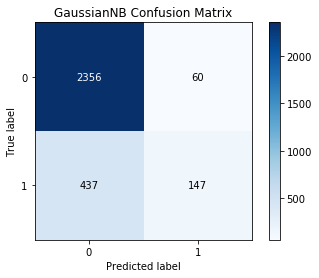

In [46]:
# Plot confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_nb)
plt.title('GaussianNB Confusion Matrix')
plt.show()

### Conclusion
  
While banks are always on a lookout for new customers, it is very important to make sure to keep the existing customer base happy. Customer retention increases banks customers' lifetime value and boosts banks revenue. It also helps the bank to build amazing relationships with the customers. They trust the bank with their money based on the value they receive in exchange. Existing customers can drive repeat business, increase revenue, create brand ambassadors, defend against competition and gain valuable feedback.  

With the help of machine learning algorithms, banks will be able to predict who are the customers who are at risk of closing the accounts with the bank and also determine the factors which are leading to customer churn in their bank.   
  
- As proven by SelectKBest, ‘Age’ plays a major factor in employee attrition. 
- Using Random Forest Model our model will correctly predict if customers will leave the bank or not 86.1% of the time.
- Support Vector Classifier model will correctly predict if customers will leave the bank or not 82.16% of the time.
- Gaussian Naive Bayes model will correctly predict if customers will leave the bank or not 80.85% of the time.
- Random forest model has fewer false positives than Support Vector Classifier model or Gaussian Naive Bayes model making it a better model.